# COGS 108 - ChronoLit: A Model for Estimating Author’s Birth Year from Literary Texts

## Video URL: https://youtu.be/r4-Gzj8diDo

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [X] YES - make available
* [ ] NO - keep private

# Names

- Jared Simpauco
- Colin Kavanagh
- Darren Jiang
- Chester Kai Ni
- Jack Howe

# Abstract

Languages evolve over time. Two texts from the same language expressing the same idea may look drastically different if they are written 500 years apart. As languages evolve, not only does vocabulary change, but so do grammar, syntax, figures of speech, and more. In this project, we pull texts from [Project Gutenberg](https://gutenberg.org/) to create and test several models that estimate the year an author was born in based on the type of text used in their published written literature. After experimenting with both standard (SVM, KNN, Random Forest, Gradient Boosting) and contemporary approaches (Neural Networks), we find that there is indeed correlation between writing style and time period. We successfully build models to predict an author's birth year based on their text with a RMSE of around 50 years, meaningfully outperforming random guessing.

# Research Question

Based on the excerpts of an author's written published literature, can we create a model that determines the author's birth year better than randomly guessing?

## Background and Prior Work

While it is not a well-documented or widely explored field, there have been attempts to address similar problems in authorship attribution, age detection from text, and author profiling. However, estimating an author's birth year directly from text is a more specific and nuanced problem. For our report, we pull random passages from [Project Gutenberg](https://gutenberg.org/), which is a non-profit online library of free eBooks. We build a dataset from the content of these passages and metadata acquired using [Gutendex](https://github.com/garethbjohnson/gutendex), a third-party metadata API for Project Gutenberg.

Before proceeding with our analysis, we begin by researching articles that may support our research question and help prove the validity of our project. According to the article "Review of age and gender detection methods based on handwriting analysis" by Fahimeh Alaei & Alireza Alaei, “developing an automated handwriting analysis system to detect a gender or age category from handwriting samples involves two stages, developing and training a model and then testing the trained model” (Alaei). While analysis of handwriting is different from analysis of text, being able to discern the difference in age based on one’s writing style is something we consider in the creation of our own models. Additionally, this lends creedence to our research question as if a model can determine an author's age based on handwriting, another model may very well be able to determine an author's time period based on their writing style.

Another article that supports our project is "Age Detection in Chat" by Jenny Tam and Craig H. Martell. Using Naive Bayes Classifier (NBC), they tested for differences in text length, emoticon usage, and punctuation to determine a person's age. They found that “as she compared teens against older and older age groups, however, her results monotonically increased until generating an f-score measure of 0.932 for teens against 50 year olds” (Tam & Martell). This research indicates that there is a significant difference between the writing style of younger and older generations as the test they made was highly accurate. Given their research was done during the same time period there is a possibility that we can create a model that can detect these differences between differing time periods.

Alaei, F., Alaei, A. Review of age and gender detection methods based on handwriting analysis. Neural Comput & Applic 35, 23909–23925 (2023). https://doi.org/10.1007/s00521-023-08996-x

J. Tam and C. H. Martell, "Age Detection in Chat," 2009 IEEE International Conference on Semantic Computing, Berkeley, CA, USA, 2009, pp. 33-39, doi: 10.1109/ICSC.2009.37.

# Hypothesis


Based on our preliminary research, we hypothesize that the models we work with will be able to find a correlation between the style of writing within samples of literature and the time period in which they were written. We estimate that our models will be able to accurately predict an author's birth year with around or better than a Root Mean Square Error (RMSE) value of 100 years. The English language has and continues to evolve over time, and certain trends may manifest within grammatical structures and vocabulary. However, we are aware that many factors could affect our ability to accurately predict the time period associated with the literature – for instance, translated texts may stylistically be more similar to other texts from the period of time when they were translated, as opposed to the period of time during which they were written.

# Data

## Data overview

- Dataset #1
  - Dataset Name: Book ID & Author DOB
  - Link to the dataset: N/A
  - Link to API used: https://github.com/garethbjohnson/gutendex
  - Number of observations: ~3200
  - Number of variables: 2

- Dataset #2
  - Dataset Name: Book ID & Book Excerpts
  - Link to the dataset: N/A
  - Link to API used: https://www.gutenberg.org/cache/epub/
  - Number of observations: ~9600
  - Number of variables: 2

- Dataset #3
  - Dataset Name: Final Dataset
  - Link to the dataset: N/A
  - Number of observations: ~8700
  - Number of variables: 3

### Dataset 1: Book ID & Author DOB
In our first dataset, we store the author's year of birth and a book ID for each one of roughly 3200 books selected from the Project Gutenberg library. We selected books by querying Project Gutenberg’s unofficial API to find roughly 640 books from each century from the year 1500 through 1999. The API is also able to provide metadata about each book, such as the book id, the author’s name, the author’s date of birth, etc. Using this API, we put together our first dataset.

Variables:
- book_id: (int) ID of book
- birth_yr: (int) the birth year of the author

### Dataset 2: Book ID & Book Excerpts
For the second dataset, we randomly sampled three excerpts from each of the ~3200 books. This means we have around ~9600 observations. Each excerpt represents roughly one paragraph from within the book, and we will be using these paragraphs to determine the time period the book was written. This dataset was put together using Project Gutenberg’s official texts API.

Variables:
- book_id: (int) ID of the book 
- book excerpts: (str) the randomized excerpts pulled from the books

### Dataset 3: Final Dataset
For our third (and main) dataset, we combine the two previous datasets by joining them using the book IDs. From there, some cleaning will be required. During merging, any rows that are not included in either one of the datasets will not be included in the final dataset. Any rows that have null or NaN values will also be removed. Additionally, some text samples are not true excerpts from the text, but rather a list of section names or the table of contents. These types of rows normally have less tha 50 characters, and will be removed as well.

Variables:
- book_id: (int) ID of the book 
- book excerpts: (str) the randomized excerpts pulled from the books
- birth_yr: (int) the birth year of the author

Total size of compressed data files: 6.13 MB

## Dataset #1: Book ID & Author DOB

Notes:
- All code that generates the datasets can be found at: "Project_Files/pull_data.ipynb"
- To run the code correctly and to avoid unnecessary generation of datasets, make sure to unzip/uncompress the data.zip file

In [1]:
# Libraries for Dataset Creation
from urllib.request import urlopen 
from urllib.error import HTTPError
import json 
import numpy as np
import csv
import re
import random
import pandas as pd
import os

# Import Models
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_squared_error
from sklearn import svm
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Hide Warnings (for Presentation)
import warnings
warnings.filterwarnings('ignore')

# Additional Libraries for EDA
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')
import torch

[nltk_data] Downloading package stopwords to /home/admin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/admin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Left justify markdown tables

In [3]:
%%html
<style>
table {float:left}
</style>

In [4]:
# Ensure that data files have been extracted
assert os.path.isdir("Project_Files/data"), "Please unzip data.zip file in Project_Files before running this notebook"

In [5]:
def pull_data(min_yr = 1500, max_yr = 2000, num_pgs = 20):
    # Creates a 2d numpy array, where the first column is the book id and 
    # the second column is the year that the author was born
    data = []

    for yr in range(min_yr, max_yr, 100):
        for pg in range(1, num_pgs + 1, 1):
            # Show Progress
            print(f"Processing Year {yr}, Page {pg}/{num_pgs}", end='\r')
            # Create a query that gets all books where the author is alive in the specified century at the specified page
            url = f"http://gutendex.com/books?author_year_start={yr}&author_year_start={yr + 99}&languages=en&page={pg}"
            # Pull resulting json file
            response = urlopen(url)
            data_json = json.loads(response.read()) 
            # Save book id and author birth year in data
            data_pg = np.array([(x['id'], x['authors'][0]['birth_year']) for x in data_json['results']])
            data.extend(data_pg)
            
    return np.array(data)

In [6]:
try:
    # Check if date_data.csv exists
    date_data = pd.read_csv("Project_Files/data/date_data.csv").astype(int)
except FileNotFoundError:
    # If date_data.csv doesn't exist, pull neccessary data using Gutendex API
    date_data = pull_data()
    # Save resulting data in csv file
    data_csv = {'book_id': int(date_data[:,0]), 'birth_yr': int(date_data[:,1])}
    with open('data/date_data.csv', 'w') as f:
        w = csv.writer(f)
        w.writerow(data_csv.keys())
        w.writerows(zip(*data_csv.values()))
    # Pull data as pandas Dataframe for further use
    date_data = pd.read_csv("Project_Files/data/date_data.csv").astype(int)

date_data.head()

,book_id,birth_yr
0,84,1797
1,1513,1564
2,1342,1775
3,25344,1804
4,345,1847


## Dataset #2: Book ID & Book Excerpts

In [7]:
def get_text(book_id):
    # Pulls the text file from the Gutenberg Archive of a given book using its book id
    url = f"https://www.gutenberg.org/cache/epub/{book_id}/pg{book_id}.txt"
    text = urlopen(url).read()
    return text

def get_text_samples(text, num_samples = 3):
    # Get rid of Guttenberg Header and footer
    book_text = [x.strip() for x in text.decode("utf-8").split('***')][2]
    # Remove '\r' symbol
    book_text = re.sub(r"[\r]+", "", book_text)
    # split by paragraph breaks
    book_text = re.split(r"\n{2,}", book_text)
    # remove paragraphs that are less 8 average length sentences long
    book_text = list(filter(lambda x: len(x) >= (50 * 8), np.array(book_text)))
    # Randomly sample remaining paragraphs
    paragraphs = random.sample(book_text, min(num_samples, len(book_text)))
    # Replace \n with ' ' and return paragraphs
    return np.array([re.sub(r"\n", " ", p) for p in paragraphs])

In [8]:
def create_excerpt_data(data):
    # Creates a 2d numpy array of the book id and randomly sampled
    # paragraphs within the book
    book_ids = data[:,0].astype(int)
    book_samples = []
    invalid_ids = []

    for i in range(book_ids.shape[0]):
        # For each book try to access the text file
        try:
            text = get_text(book_ids[i])
        except HTTPError as err:
            # If unable to access the text file, display the error code 
            # and save the book_id in invalid_ids for logging purposes
            print(f"HTTP {err.code} Error: book_id = {book_ids[i]}")
            invalid_ids.append(book_ids[i])
            
        # Clean and randomly sample text samples
        text_samples = get_text_samples(text)
        # Combine text samples with associated book_id
        ids = np.full(len(text_samples), book_ids[i])
        # Save samples and book id into book_samples
        samples = np.array(list(zip(ids, text_samples)))
        book_samples.extend(samples)
        
        # Show Progress
        print(f"Progress: {i/book_ids.shape[0]}", end='\r')

    return np.array(book_samples), invalid_ids

In [9]:
try:
    # Check if excerpts.csv exists
    excerpt_data = pd.read_csv("Project_Files/data/excerpts.csv")
except FileNotFoundError:
    # If excerpts.csv doesn't exist, create necessary data
    book_samples, invalid_ids = create_excerpt_data(date_data.to_numpy())
    # Save resulting excerpts in csv file
    book_data_csv = {'book_id': book_samples[:,0], 'text': book_samples[:,1]}
    with open('data/excerpts.csv', 'w') as f:
        w = csv.writer(f)
        w.writerow(book_data_csv.keys())
        w.writerows(zip(*book_data_csv.values()))
    # Pull data as Pandas DataFrame fro further use
    excerpt_data = pd.read_csv("Project_Files/data/excerpts.csv")

excerpt_data.head()

,book_id,text
0,84,"“And now, with the world before me, whither sh..."
1,84,"“You have been ill, very ill, and even the con..."
2,84,“I intended to reason. This passion is detrime...
3,1513,NURSE. Then hie you hence to Friar Lawrence’ c...
4,1513,"FRIAR LAWRENCE. I will be brief, for my short ..."


## Dataset #3: Final Dataset

In [10]:
try:
    # Check if data.csv exists
    data = pd.read_csv("Project_Files/data/data.csv")
except:
    # Merge Datasets together (removing nan values in the process)
    data = excerpt_data.merge(date_data, how='inner').drop_duplicates().reset_index(drop=True)
    # remove entries where text is less than 50 characters long
    data = data[data['text'].apply(lambda x: len(re.findall(r"\w+", x)) > 50)]
    # strip any remaining whitespace from the text
    data['text'] = data['text'].str.strip()
    # drop a specific entry that we manually identified as a table of contents
    data = data.drop(4996)
    # Save final dataset to csv file
    data.to_csv("Project_Files/data/data.csv", index=False)

data.head()

,book_id,text,birth_yr
0,84,"“And now, with the world before me, whither sh...",1797
1,84,"“You have been ill, very ill, and even the con...",1797
2,84,“I intended to reason. This passion is detrime...,1797
3,84,"“How is this? I must not be trifled with, and ...",1797
4,84,"“A few days after, the Turk entered his daught...",1797


# Results

## Exploratory Data Analysis

For our initial EDA, we check to see how many books and excerpts we managed to collect after some initial cleaning.

In [11]:
print(f"Number of books in dataset: {data['book_id'].unique().shape[0]}")
print(f"Number of excerpts in dataset: {data.shape[0]}")

Number of books in dataset: 1524
Number of excerpts in dataset: 8718


### Excerpt Length

When building the dataset, we randomly sample excerpts from books in the Guttenberg project. One of the first things we look at is the distribution of excerpts lengths of the entire dataset. To do this, we create a new column for EDA purposes:
- text_len: the number of characters in the 'text' column

,book_id,text,birth_yr,text_len
0,84,"“And now, with the world before me, whither sh...",1797,663
1,84,"“You have been ill, very ill, and even the con...",1797,931
2,84,“I intended to reason. This passion is detrime...,1797,938
3,84,"“How is this? I must not be trifled with, and ...",1797,542
4,84,"“A few days after, the Turk entered his daught...",1797,521


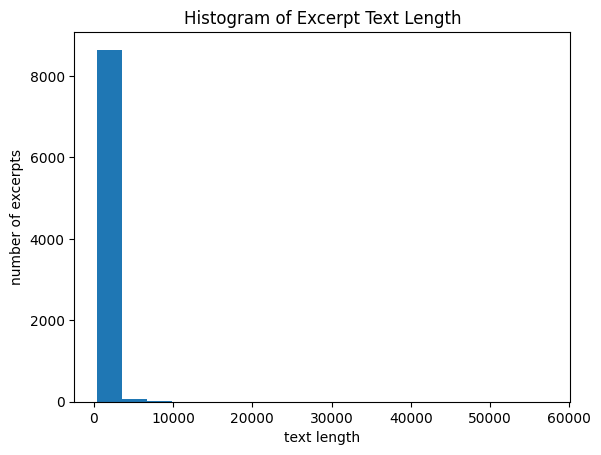

In [12]:
# Create new column that contains number of characters of each text
text_len = data['text'].str.len()
data['text_len'] = text_len

# Display the distribution of text length 
plt.hist(
    data['text_len'],
    bins = 18
)
plt.xlabel('text length')
plt.ylabel('number of excerpts')
plt.title('Histogram of Excerpt Text Length')

# Print out the dataset with new text_len column
data.head()

In this visualization, it is difficult to see the distribution, so we remove outliers in text length by removing any excerpts that are greater than 3 standard deviations greater than the mean:

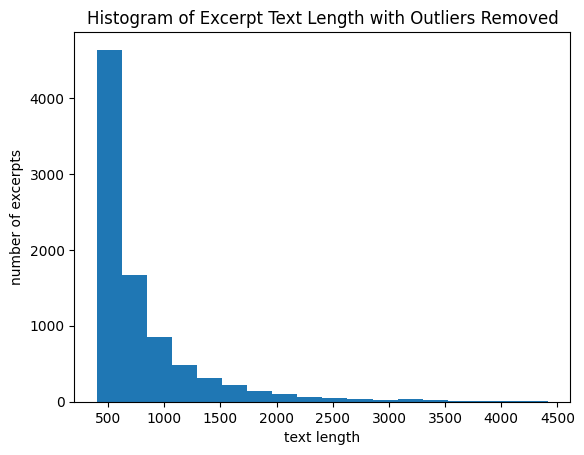

In [13]:
# Calculate threshold to remove values
t = data['text_len'].mean() + 3 * data['text_len'].std()

# Remove excerpts that are greater the threshold
data = data.loc[data['text_len'] < t]

# Display the new distribution of text length 
plt.hist(
    data['text_len'],
    bins = 18
)
plt.xlabel('text length')
plt.ylabel('number of excerpts')
plt.title('Histogram of Excerpt Text Length with Outliers Removed');

### Author Birth Year

When creating our dataset, we aim to pull a consistent amount of books from each century. We want a roughly equal number of excerpts written by authors born in each century from 1500 to 1900. However, due to the way the Gutenberg API works, the closest that we can do is pull a set number of books where the author was alive from each century. Because of this, and following our data cleaning, we move forward by checking the actual distribution of author birth years.

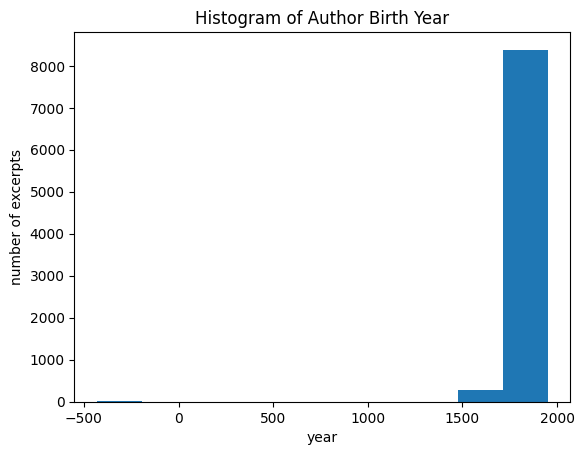

In [14]:
plt.hist(
    data['birth_yr']
)
plt.xlabel('year')
plt.ylabel('number of excerpts')
plt.title('Histogram of Author Birth Year');

Similar to text length, there seems to be an outlier with author birth year, where one or more authors were born before 1400

In [15]:
data[data['birth_yr'] < 1400]

,book_id,text,birth_yr,text_len
2750,71894,It was arranged that the band of volunteers sh...,-431,418
2751,71894,"Almost all the officers were of the same mind,...",-431,465
2752,71894,It was now necessary to find some means of cro...,-431,762
2753,71894,They overcame the difficulty however by means ...,-431,468
2754,71894,It was at first proposed to advance in the for...,-431,653
2755,71894,There could no longer be any doubt that the Ca...,-431,652
2756,71894,But Cyrus had long ago foreseen this difficult...,-431,443
2757,71894,"This speech made the desired impression, for t...",-431,435
2758,71894,"Best as well as last of all, was the horse-rac...",-431,587


After some searching, we find that it was a single book from a single author, which turned out to be "The Retreat of Ten Thousand", which was a Greek Epic that was translated to English and published again in 1897. Because it was translated into English, and because this is the only outlier in terms of author birth year, we remove it from the dataset.

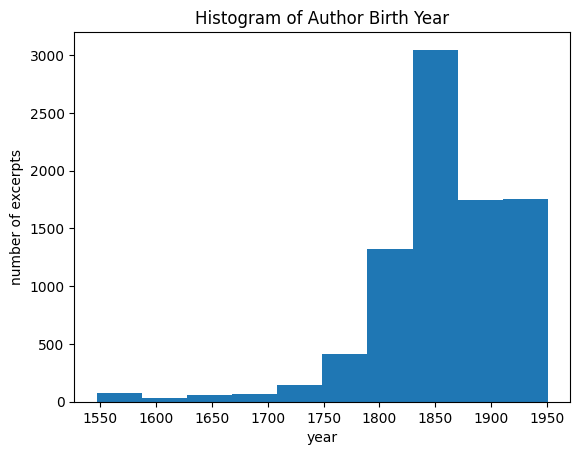

In [16]:
# Remove outlier from data
data = data[data['birth_yr'] >= 1400]

# Display new histogram of author birth years
plt.hist(
    data['birth_yr']
)
plt.xlabel('year')
plt.ylabel('number of excerpts')
plt.title('Histogram of Author Birth Year');

There seems to be a significant skew in the dataset, where there are significantly more books from authors born between 1800-2000 compared to 1500-1800.

In [17]:
data['birth_yr'].describe()

count    8668.000000
mean     1855.454199
std        59.907674
min      1547.000000
25%      1832.000000
50%      1861.000000
75%      1894.000000
max      1951.000000
Name: birth_yr, dtype: float64

Looking at the summary statistics of the author's birth year seems to match this observation, as the 25th, 50th, and 75th percentile percentiles all fall in the 1800-1900 century.

In [18]:
# Creating new Dataset to look at distribution of books per century
centuries = data.copy()

# Creaing conditions #
centuries_cond = [
    (centuries['birth_yr'] >= 1500) & (centuries['birth_yr'] < 1600),
    (centuries['birth_yr'] >= 1600) & (centuries['birth_yr'] < 1700),
    (centuries['birth_yr'] >= 1700) & (centuries['birth_yr'] < 1800),
    (centuries['birth_yr'] >= 1800) & (centuries['birth_yr'] < 1900),
    (centuries['birth_yr'] >= 1900) & (centuries['birth_yr'] < 2000)
]

In [19]:
# Creating century column #
centuries['Century'] = np.select(centuries_cond, ['16th', '17th', '18th', '19th', '20th'], default='null')

# Removing null values (outliers) #
centuries = centuries[centuries['Century'] != 'null']

# Getting counts #
centuries = (
    centuries
    .groupby('Century')[['text']]
    .count()
    .reset_index()
    .rename(columns={
        'text': 'Count'
        }
    )
)

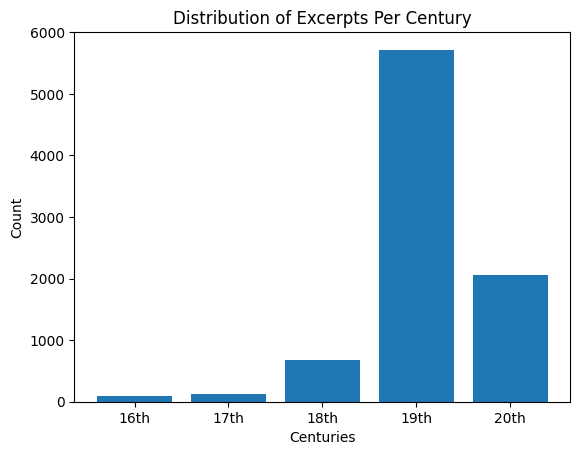

In [20]:
plt.bar(x='Century', height='Count', data=centuries);
plt.xlabel('Centuries');
plt.ylabel('Count');
plt.title('Distribution of Excerpts Per Century');

### Author Birth Year vs Text Length

Beyond just looking at the distribution of author birth year or text length, we determine if there is any correlation between the birth year and the text length. 

To do so, we create a scatter plot where the x-axis is the author's birth year and the y-axis is the excerpt text length. We also plot the line of best fit in order to visually see any kind of correlation, if there is any.

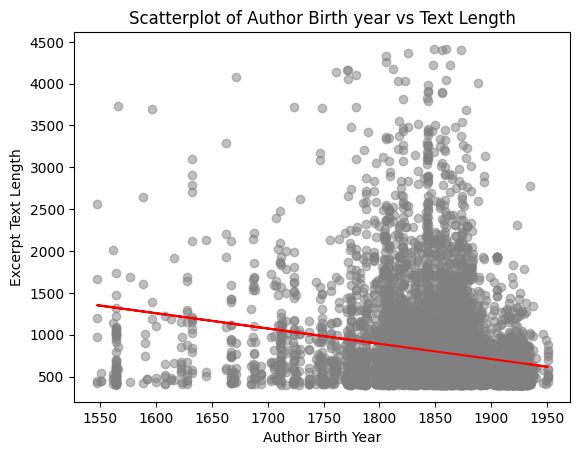

In [21]:
# Create line of best fit
a, b = np.polyfit(
    data['birth_yr'].to_numpy(), 
    data['text_len'].to_numpy(), 
    1
)
# Plot scatter plot of birth year and text length
plt.scatter(
    x = data['birth_yr'], 
    y = data['text_len'],
    alpha = 0.5,
    c = 'gray'
)
plt.xlabel('Author Birth Year')
plt.ylabel('Excerpt Text Length')
plt.title('Scatterplot of Author Birth year vs Text Length');
# Plot line of best fit
plt.plot(
    data['birth_yr'].to_numpy(), 
    a * data['birth_yr'].to_numpy() + b,
    color='red'
) ;

From the plot, we can see a weak negative correlation between the excerpt text length and the author's birth year. This is likely due to the fact that there are significantly more books in the dataset written during 1750-1950 compared to 1550-1750. Beyond the line of best fit, we can see from the scatterplot itself that the are no obvious indicator of any kind of trend, and creating a more balanced, randomly sampled dataset will likely reduce this weak correlation even further.

### Balanced Dataset

From the previous correlation, it's obvious to see that there is a significant skew in the distribution of birth years in the dataset. To fix this, we want to create a new balanced dataset by randomly sampling a set number of excerpts from each century.

The first thing we do is create a new column that indicates the century the author was born in.

In [22]:
# Create a new column that indicates century
data['birth_ctry'] = data['birth_yr'] // 100 + 1
data.head()

,book_id,text,birth_yr,text_len,birth_ctry
0,84,"“And now, with the world before me, whither sh...",1797,663,18
1,84,"“You have been ill, very ill, and even the con...",1797,931,18
2,84,“I intended to reason. This passion is detrime...,1797,938,18
3,84,"“How is this? I must not be trifled with, and ...",1797,542,18
4,84,"“A few days after, the Turk entered his daught...",1797,521,18


Once we have that column, we group the dataset by the newly created birth century column ('birth_ctry') and randomly sample 200 excerpts from each century. We do this random sampling with replacement, because several centuries have less than 2000 excerpts in it.

In [23]:
# Randomly sample 2000 entries from each century
data_balanced = (
    data
    .groupby('birth_ctry')
    .apply(
        lambda x: x.sample(2000, replace=True)
    )
    .reset_index(drop=True))
data_balanced.head()

,book_id,text,birth_yr,text_len,birth_ctry
0,1526,Daylight and champian discovers not more! This...,1564,995,16
1,25929,"EPI. Your three reasons as I take, ar grounded...",1566,3727,16
2,575,"So when any of the four pillars of government,...",1561,414,16
3,1112,Fri. The gray ey'd morne smiles on the frown...,1564,1020,16
4,23042,I. 2. 135: _to 't_] om. Steevens (Farmer con...,1564,427,16


Now with this new balanced dataset, we look at the distribution again in order to see if the negative correlation we saw in the earlier visualization has been affected in any way

count    10000.00000
mean      1751.00160
std        130.33892
min       1547.00000
25%       1628.00000
50%       1774.00000
75%       1870.00000
max       1951.00000
Name: birth_yr, dtype: float64

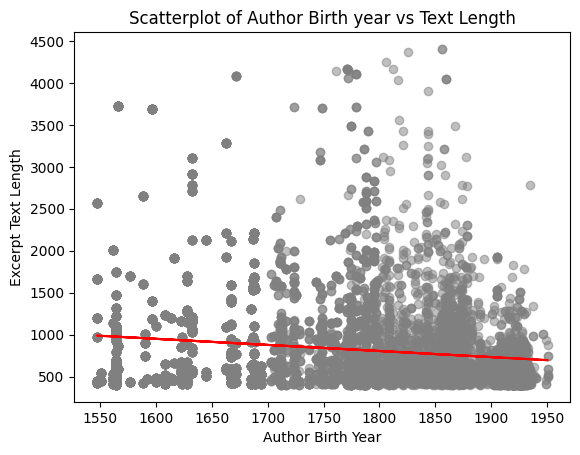

In [24]:
# Create line of best fitDAT
a, b = np.polyfit(
    data_balanced['birth_yr'].to_numpy(), 
    data_balanced['text_len'].to_numpy(), 
    1
)
# Plot scatter plot of birth year and text length
plt.scatter(
    x = data_balanced['birth_yr'], 
    y = data_balanced['text_len'],
    alpha = 0.5,
    c = 'gray'
)
plt.xlabel('Author Birth Year')
plt.ylabel('Excerpt Text Length')
plt.title('Scatterplot of Author Birth year vs Text Length');
# Plot line of best fit
plt.plot(
    data_balanced['birth_yr'].to_numpy(), 
    a * data_balanced['birth_yr'].to_numpy() + b,
    color='red'
) 
# Show new quartiles and summary statistics
data_balanced['birth_yr'].describe()

From the figure, we can see that the already weak negative correlation is weaker in the new balanced dataset

### Common Words

Throughout our EDA process, we look at numerical data such as the author birth year and the length of the excerpt without really looking into the content of the excerpts themselves. Since our project is primarily focused on predicting an author's birth year by looking at the writing style and vocabulary of the associated text excerpt, we want to get a better idea of the vacabulary being used.

We approach the problem of identifying author birth year using TF-IDF. While the result of TF-IDF vectorizer is not likely to be visually interesting or helpful, it may be useful to see common words that appear in the excerpts and identify any invalid words that come up. As such, we briefly look into some of the most common words that appear in the dataset.

To start off, we create a copy of the dataset in order to remove punctuation and do some text processing

In [25]:
# Create a copy of the dataset to do text analysis on
data_tfidf = data.copy()

# Process the dataset by removing punctuation for TF-IDF
def preprocess(text):
    text = re.sub(r'[^A-Za-z0-9]+', " ", text)
    text = text.lower()
    return text
data_tfidf["text"] = data.get("text").apply(preprocess)
data_tfidf.head()

,book_id,text,birth_yr,text_len,birth_ctry
0,84,and now with the world before me whither shou...,1797,663,18
1,84,you have been ill very ill and even the const...,1797,931,18
2,84,i intended to reason this passion is detrimen...,1797,938,18
3,84,how is this i must not be trifled with and i ...,1797,542,18
4,84,a few days after the turk entered his daughte...,1797,521,18


Here we standardize text length so that all texts are 1000 characters long. If they are longer originally, we truncate, and if they are shorter, we pad the end with spaces.

In [26]:
def resize_text(text):
    if len(text) >= 1000:
        return text[:1000]
    else:
        return text + " " * (1000-len(text))
    
data_tfidf["text"] = data_tfidf["text"].apply(resize_text)

From here, we create a TF-IDF Vectorizer to vectorize the excerpts and find some of the most common words used in the dataset

In [27]:
# Create a standard TF-IDF using arbitrary parameters
tfidf = TfidfVectorizer(
    sublinear_tf=True,
    analyzer='word',
    max_features=2000,
    tokenizer=nltk.tokenize.word_tokenize,
    stop_words=stopwords.words("english")
)

In [28]:
# Vectorize the excerpt text 
tfidf_array = tfidf.fit_transform(data_tfidf["text"]).toarray()
text_tfidf = pd.DataFrame(tfidf_array)
text_tfidf.columns = tfidf.get_feature_names_out()
# Pull the top ten most unique words used in the dataset
most_unique = text_tfidf.idxmax(axis = 1)
most_unique[:10]

0     resolved
1      journey
2     creature
3    existence
4     daughter
5         rain
6         pity
7      absence
8        heart
9         cell
dtype: object

From here, we can see the 10 most unique words in the dataset.

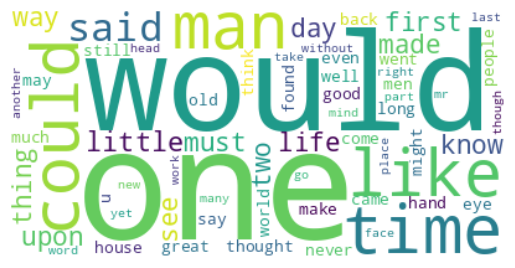

In [29]:
# Join all the text in the column into one string
text = " ".join(i for i in data_tfidf.text)

# Create a WordCloud object with some parameters
wordcloud = WordCloud(background_color="white", stopwords=stopwords.words("english"), min_font_size=10).generate(text)

# Plot the word cloud using matplotlib
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In the Word Cloud above, we identify that the words most consistenly found in our data are the words: one, would, and time, in that order. This is not what we were expecting to happen as we wanted to find specific key words which would help identify the time period each of these text excerpts were from. Most of the other words appear to be text we still say or use in modern day English, but the context that the words are used in may differ across time periods.

## Models

After completing our EDA, we build various models to test our ability to predict an author's birth year based on their writings. We use Support Vector Machines, K Nearest Neighbors, Gradient Boosting, Random Forests, and Neural Networks. We use the Root Mean Squared Error to calculate the residuals from the actual years. 

In [30]:
X_train, X_test, y_train, y_test = train_test_split(text_tfidf,
                                                    data.get("birth_yr"),
                                                    test_size = 0.2,
                                                    random_state=1)

### SVM

In [31]:
clf = svm.SVC(kernel="linear")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

57.63820460213682

### KNN

In [32]:
knn = KNeighborsRegressor(n_neighbors=8) #8 was determined to be best via a previous model
    
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

53.950514679375864

### XGBoost Regressor

In [33]:
xgb = XGBRegressor(n_estimators=2, max_depth=2, learning_rate=1, objective='reg:linear')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

58.98716698444824

### Random Forest

#### Classifier

In [34]:
# GridSearched on separate file due to runtime #
rf_classifier = RandomForestClassifier(max_depth=70, criterion='gini', random_state=1)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

64.56404686538419

#### Regressor

In [35]:
# GridSearched on separate file due to runtime #
rf_regressor = RandomForestRegressor(max_depth=80, criterion='squared_error', random_state=1)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

53.39336517552927

### LSTM Neural Network Regressor

In [37]:
from Project_Files import model_testing
# models were trained using model_testing.py due to runtime
# To train new models, use the following terminal commands:
#       python Project_Files/model_testing.py {n_epoch}

# Get best performing model
with open("Project_Files/models/sleep_train/log.txt", "r") as log_file:
    text = list(log_file)
    best_epoch = int(text[0].split(": ")[1])

# define model hyper-parameters
input_size = tfidf.max_features
hidden_size = 200

lstm_regressor = model_testing.LSTM_REGR(input_size, hidden_size, n_layers=6)
lstm_regressor.load_state_dict(torch.load(f"Project_Files/models/sleep_train/LSTM_epoch_{best_epoch}.pt"))
lstm_regressor.eval()

# Evaluate test rmse
y_pred = model_testing.predict(lstm_regressor, X_test.to_numpy())
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

79.94947312532199

# Ethics & Privacy

To answer our research question, the main ethical concern was the need to pull excerpts of text from books. However, we cannot just simply pull excerpts out of any book. This is due to US copyright restrictions and the rights we have to use a book outside of the ordinary use of just simply reading them. In order to counteract this, we gather our text data from [Project Gutenberg](https://www.gutenberg.org/), where all books published onto the website have their US copyright expired. Therefore, all the books posted onto the website are free to use since there is no longer a restriction on how they can be utilized. In addition, all books that are on Project Gutenberg are [free to use however the user sees fit](https://www.gutenberg.org/policy/permission.html) and therefore, will not be a problem in regards to data privacy.

A potential bias with the dataset is the type of books that are collected from scraping the website. To elaborate, books are added based on community input, thus books that are popular with the modern community are more likely to be added, and we are limited to what is available. Because of this, we had no clue as to what genre or even slang for each book that we pulled from Project Gutenberg and the impact it potentially had on our results. Adding onto this, since we cannot feasibly pull samples from every single book from the website, more recently added books are more likely to be added to our dataset, leaving behind the books that have been added for a longer time. While we cannot control what gets onto the website, we randomly sampled in order to include more works that were added further back in time rather than only those that were added recently.

# Discussion and Conclusion

## Our Problem

In our investigation, we set out to construct a predictive model that discerns an author's birth year based on the stylistic nuances found in excerpts of their published literature. We initially anticipated that this model would leverage linguistic patterns present in the writing style, potentially allowing for a correlation between these traits and the temporal context of the work's creation. We understood that there would be complexities inherent in this task as the evolving nature of the English language is not a widely studied topic in data science. Moreover, factors such as bias in publication selection or translated publications could have impacts on the accuracy of our models. Despite these challenges, we set a goal to develop a model to predict an author's birth year with an accuracy surpassing random guessing, aiming for a Root Mean Square Error (RMSE) value of 100 years or better.

## Building a Dataset

For our analysis, our data consists of publically available texts from Project Gutenberg. We made use of two separate APIs – one to sample and acquire texts spanning from 1500-1999, and one to collect metadata for each text. We built one dataset using each API, then joined them together to form our final dataset. This would contain both text samples and their associated author’s birth year.

## Exploratory Data Analysis

Once we had our final dataset, we wanted to do some exploratory analysis on both the text and the author's birth dates. One of the first things we looked at was the distribution of excerpts lengths of the entire dataset. The resulting histogram was extremely skewed, to the point that only one of the bins was actually visible. To address this, we removed any excerpts that were three standard deviations longer than the average excerpt length. This gave us a more reasonable distribution of excerpt lengths. 

The second thing we wanted to look at was the distribution of author birth years. After removing outliers (i.e. excerpts with author birth dates <1500), we saw that there seemed to be a significant skew in the dataset, where there were significantly more excerpts in which the author was born between 1800-2000 compared to 1500-1800. It’s possible that the Gutenberg Library had a smaller collection of books from before 1800, or some books got repeatedly drawn when we were drawing books from the API. Regardless, all the books from the 25-75th quartile were between 1832-1894. To address this bias in author birth dates, we created a balanced dataset by randomly selecting an equal amount of excerpts from each century.

The final exploratory analysis we did was to look at the frequency of words within the excerpt. We wanted to find the most frequently used words and the most unique, so we created a TF-IDF vectorizer in order to do so. We found that some of the most unique words were “resolved”, “journey”, and “time”.  Notably, these are all words that would be fairly common in writing found in older texts, which could be explained with the skew in author birth distributions that we saw earlier.

## Building Models

After completing our Exploratory Data Analysis, we proceeded by developing a list of models to experiment with. From the Scikit-Learn library we tested Supported Vector Machines, K-Nearest Neighbors, and Random Forest models. These models represent three classic and popular approaches to regression problems and are comparatively efficient and easy to work with. As such, we tested them to start off. Similarly, we tested Gradient Boosting using the XGBoost library, another powerful and efficient tool with regression. Beyond that, we also trained and tested a LSTM Neural Network Regressor. This approach was far more time-consuming than any of the others, as training a neural network requires exponentially more computational power. However, we chose to experiment with a more complex model to determine how it might compare to our other options.

In order to fairly compare our models, we used the same random seeds for each model and trained all of them on the results of applying TF/IDF with the same number of features. We created train and test splits, with test size as 0.2, and used the same splits across all models. For our Neural Network Model, we modularized the training script and saved our trained model onto a separate file, which we load into this notebook to evaluate. This saves us the time needed to train a Neural Network Regressor every time we run this main project notebook.

## Testing Models
The six models we tested achieved the RMSE values as follows:

|Model                   |RMSE              |
|:-----------------------|:-----------------|
|SVM                     |57.63820460213682 |
|KNN                     |53.950514679375864|
|XGBoost                 |58.98716698444824 |
|Random Forest Classifier|64.56404686538419 |
|Random Forest Regressor |53.39336517552927 |
|LSTM Neural Network     |79.94955040243563 |

We found that the KNN and Random Forest (regressor) models worked the best when evaluated on the RMSE performance metric. KNN worked well on the data because it works well with non-linear relationships and is resistant to strong outliers. Even though we were dealing with high dimensions of data, KNN was almost able to get its error to be within half a century. Random Forest Regression is also suitable for non-linear relationships and outliers. We found Random Forest Classification and LSTM were some of the worst because they are not necessarily designed to work with this data type. RFC is for classifying data, while LSTM is more designed to work with sequential data like time series. The SVMs and XGBoost models did moderately well because they are well-equipped to handle high data dimensions. However, they are both prone to overfitting and could have performed better.

## Final Words

Putting everything together, based on the RMSE on the test set, the Random Forest Regressor and KNN models performed best in predicting an author’s birth date. With an RMSE of ~53, we can conclude that it is possible to create a model that can predict an author’s birth date better than random guessing. Even though the Random Forest Regressor and KNN models performed the best, it can be said for all the models we tested that they all performed better than random guessing, as all models tested had an RMSE under 100.

While we were limited to publications that were available on Project Gutenberg, we feel that our models will adapt to any text due to the large time period that we covered with our dataset. With this large time period covered, our models also have the ability to predict when a text was written if that information was unknown. Theoretically, historians and linguists could take advantage of this in order to further analyze a text and gain context as to why the text was published. If we wanted to further improve our model and reduce the RMSE even more, we would have to expand the time period further to include both modern and classic text and hyper-parameterize the TF/IDF further.

# Team Contributions

|Name   |Contributions|
|:------|:------------|
|Jared  |Wrote Ethics & Privacy section, created visualization of distribution of excerpts per century, implemented and tested Random Forest models, contributed to conclusion, recorded project video|
|Colin  |Specified group expectations, refine data in EDA, created word cloud visualization, implemented TF/IDF for ML, implemented and test SVM and KNN models, contributed to conclusion, recorded project video|
|Darren |Pulled data from Project Gutenberg, build all datasets, conduct EDA on distributions of author birth year and text length, balanced dataset, implemented Logistic Regression model and LSTM Regressor model, wrote data and EDA section, contributed to conclusion, record project video|
|Chester|Wrote research question and hypothesis sections, implemented XGBoost model, experimented with Keras model, wrote abstract, edited text, contributed to conclusion, recorded and edited project video|
|Jack   |Wrote background and prior work section, responsible for group note-taking, edited text, contributed to conclusion, recorded project video|